In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input , Activation
from keras.models import Sequential

In [2]:
pip install python-mnist

In [2]:
from mnist import MNIST
mndata = MNIST('MNIST')

In [3]:
mndata.gz = True

In [8]:
X_train_intial, Y_train_intial = mndata.load_training()
X_test_initial, Y_test_initial = mndata.load_testing()

In [9]:
print(len(X_train_intial) )

60000


In [9]:
X_train = X_train_intial
Y_train = Y_train_intial 
X_test = X_test_initial
Y_test = Y_test_initial

In [10]:
index = np.random.randint(len(X_train))  # choose an index ;-)
print(mndata.display(X_train[index]))


............................
............................
............................
............................
............................
...........@.......@........
..........@@.......@........
.........@@.......@@........
.........@@.......@@........
........@@........@.........
........@@.......@@.........
........@........@@.........
.......@@........@@.........
.......@@........@@.........
.......@.........@@@@@......
.......@@@@@@@@@@@@@@.......
.......@@@@@@@@@@@@.........
........@@@@....@@..........
................@@..........
................@@..........
................@@..........
...............@@@..........
...............@@...........
...............@@...........
................@...........
............................
............................
............................


In [11]:
#after trying to fit on the original data type of X_trian (list) it did not work, so we have to transform the data type to nupmy array
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)



In [14]:
len(X_train[0])

784

In [12]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

Y_train = Y_train.astype("float32")
Y_test = Y_test.astype("float32")
 
    
X_val = X_train[-10000:] 
Y_val = Y_test[-10000:]
X_train = X_train[:-10000] 
Y_train = Y_train[:-10000]

In [236]:
print(len(X_train))
print(len(X_val))

50000
10000


In [16]:
X_train[0].shape

(784,)

In [13]:
#model_1 = Sequential()

Input = keras.Input(shape=(784,) )
L1 = Dense(64, activation='relu', name="L1")
L2 = Dense(64, activation='relu', name="L2")
L3 = Dense(10, activation='softmax', name="final")

model_1 = Sequential([Input, L1, L2, L3])

In [265]:
model_1.layers

In [240]:
#pip install livelossplot 

#to plot the losses live

In [17]:
model_1.compile(
    optimizer='rmsprop',  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    #keras.losses.SparseCategoricalCrossentropy(),
    #'categorical_crossentropy'
    # List of metrics to monitor
    metrics=['accuracy']
)

In [36]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 64)                50240     
                                                                 
 L2 (Dense)                  (None, 64)                4160      
                                                                 
 final (Dense)               (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [37]:
X_train.shape

(50000, 784)

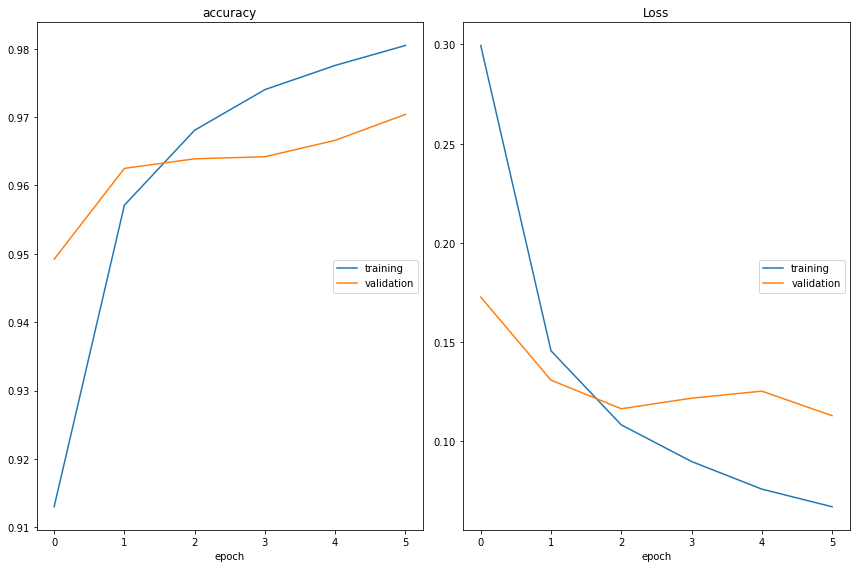

accuracy
	training         	 (min:    0.913, max:    0.980, cur:    0.980)
	validation       	 (min:    0.949, max:    0.970, cur:    0.970)
Loss
	training         	 (min:    0.067, max:    0.300, cur:    0.067)
	validation       	 (min:    0.113, max:    0.173, cur:    0.113)
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0671 - accuracy: 0.9805 - val_loss: 0.1130 - val_accuracy: 0.9704


In [18]:
from livelossplot import PlotLossesKeras

model_1.fit(X_train, 
          Y_train, 
          epochs=6,  #nb of epochs
          validation_data=(X_test, Y_test), 
          callbacks=[PlotLossesKeras()], # see progress
          verbose=1) # how do you want to 'see' the training progress for each epoch.

In [39]:
print("Evaluate model_1 on test data")
results = model_1.evaluate(X_test, Y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate model_1 on test data
79/79 [==============================] - 0s 2ms/step - loss: 0.1400 - accuracy: 0.9707
test loss, test acc: [0.13995181024074554, 0.9707000255584717]


In [270]:
X_train[0].shape

(784,)

In [273]:
np.argmax (model_1.predict (X_train[:1,]) )

1/1 [==============================] - 0s 47ms/step


5

In [290]:
index = np.random.randint(len(X_train))  # choose an index ;-)

prediction = np.argmax(model_1.predict(X_train[index].reshape(1,784) ) ) #Do't know why predict is not acceting X_train[index]
print("predoction: " , prediction)

print(mndata.display(X_train_intial[index]))

1/1 [==============================] - 0s 21ms/step
predoction:  5

............................
............................
............................
............................
............................
............................
............................
.............@@@@@@.........
............@@@@@@@@@.......
............@@@@..@@@.......
............@@......@@......
............@........@......
...........@@...............
...........@@...............
............@...............
............@@..............
.............@@@............
..............@@............
...............@............
...............@@...........
...............@............
..............@@............
.............@@.............
...........@@@@.............
.........@@@@@..............
............................
............................
............................
